# Deep Learning with Convolutional Neural Networks
## From chapter 16 - Artificial Intelligence with Python

## Building a perceptron-based linear regressor

In [1]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Defining the number of points to generate
num_points = 1200

In [3]:
# Generating the data based on equation y = mx + c
data = []
m = 0.2
c = 0.5
for i in range(num_points):
    # Generating 'x'
    x = np.random.normal(0.0, 0.8)
    
    # Generating some noise
    noise = np.random.normal(0.0, 0.04)
    
    # Computing 'y'
    y = m*x + c + noise
    
    data.append([x, y])
    
data

[[-1.7213693215131185, 0.2063931428606139],
 [-0.7126948849692364, 0.38772847454626236],
 [-2.4802340914129535, -0.014232491776802407],
 [-0.563929277747291, 0.39579075578507017],
 [1.0897157891090508, 0.7092633923003455],
 [0.19950927112460648, 0.5209664034713005],
 [0.5572366000737689, 0.6536016702004527],
 [-0.10382829175060418, 0.5154167153191433],
 [0.025683892307971436, 0.5261098646503674],
 [0.15848170342469559, 0.5271184984134751],
 [-0.08480018242581704, 0.5219857146185013],
 [0.9080247002395672, 0.6853302542449112],
 [0.6495592146627347, 0.5610149175557845],
 [-0.35012824229343875, 0.40228070989225667],
 [-0.8280093448765925, 0.2989513592466358],
 [-0.2034347854793766, 0.43964447916579824],
 [-0.5706955588230586, 0.3465352593213173],
 [-0.45628183262408784, 0.42345208314239474],
 [-0.513036400045596, 0.34027218984578717],
 [0.13381670946774868, 0.4688392885770151],
 [-0.0053423053449513, 0.5299462089316853],
 [1.220956764051782, 0.7453399081021691],
 [-1.2945713134238055, 0.2

In [4]:
# Separating x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

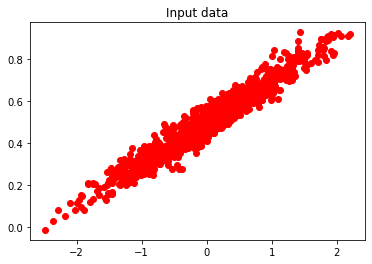

In [5]:
# Plotting the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [6]:
# Generating weights and biases
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [7]:
# Defining equation for 'y'
y = W * x_data + b

In [8]:
# Defining how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

In [9]:
# Defining the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [10]:
# Initializing all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
# Starting the tensorflow session and running it
sess = tf.Session()
sess.run(init)


ITERATION 1
W = -0.18384969
b = 0.50958985
loss = 0.09131998


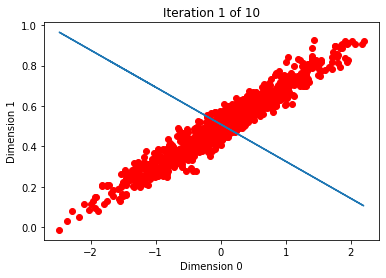


ITERATION 2
W = 0.050808027
b = 0.50391793
loss = 0.014961527


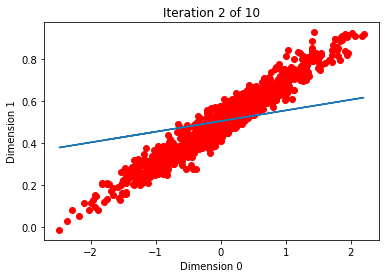


ITERATION 3
W = 0.14136496
b = 0.5017729
loss = 0.0035899489


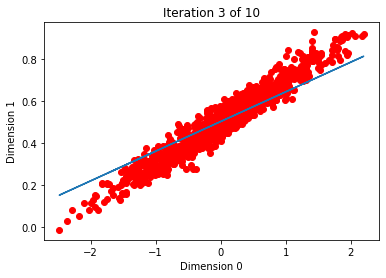


ITERATION 4
W = 0.17631143
b = 0.5009451
loss = 0.0018964531


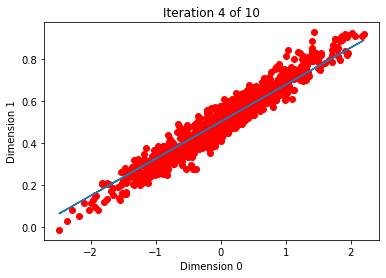


ITERATION 5
W = 0.18979749
b = 0.5006256
loss = 0.0016442514


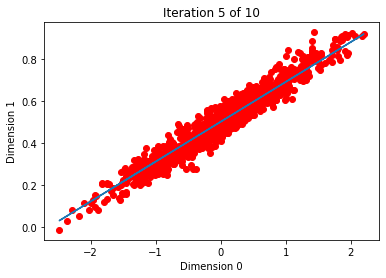


ITERATION 6
W = 0.19500186
b = 0.50050235
loss = 0.0016066924


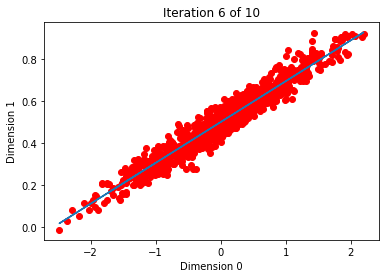


ITERATION 7
W = 0.19701025
b = 0.5004548
loss = 0.001601099


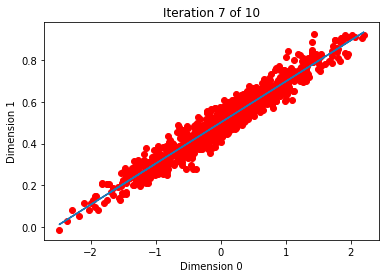


ITERATION 8
W = 0.1977853
b = 0.5004364
loss = 0.0016002662


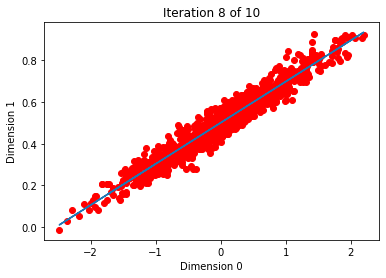


ITERATION 9
W = 0.1980844
b = 0.50042933
loss = 0.001600142


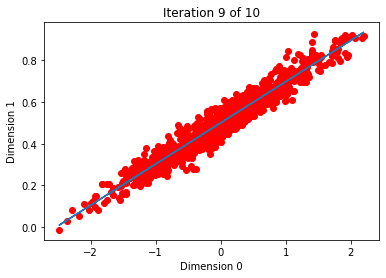


ITERATION 10
W = 0.19819982
b = 0.5004266
loss = 0.0016001236


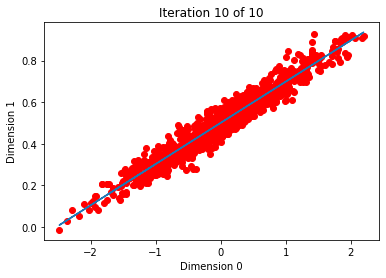

In [12]:
# Start iterating
num_iterations = 10
for step in range(num_iterations):
    # Running the session
    sess.run(train)
    
    # Printing the progress
    print('\nITERATION', step + 1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))
    
    # Plotting the input data
    plt.plot(x_data, y_data, 'ro')
    
    # Plotting the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    
    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step + 1) + ' of ' + str(num_iterations))
    plt.show()

## Building an image classifier using a single layer neural network

In [13]:
# Importing the necessary packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [14]:
# Loading data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

The images are 28x28, so create the input layer with 784 neurons (28x28=784)

In [15]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [16]:
# Normalizing inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [17]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [18]:
# Creating a simple Neural Network model
model = Sequential()
model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(num_classes, kernel_initializer = 'normal', activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
# Fitting the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2772 - acc: 0.9224 - val_loss: 0.1435 - val_acc: 0.9589
Epoch 2/10
  200/60000 [..............................] - ETA: 2s - loss: 0.1117 - acc: 0.9600

c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 1s 24us/sample - loss: 0.1116 - acc: 0.9679 - val_loss: 0.0934 - val_acc: 0.9711
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0705 - acc: 0.9796 - val_loss: 0.0764 - val_acc: 0.9753
Epoch 4/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0494 - acc: 0.9858 - val_loss: 0.0690 - val_acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0364 - acc: 0.9897 - val_loss: 0.0681 - val_acc: 0.9778
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0256 - acc: 0.9933 - val_loss: 0.0669 - val_acc: 0.9790
Epoch 7/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0201 - acc: 0.9946 - val_loss: 0.0613 - val_acc: 0.9811
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0148 - acc: 0.9967 - val_loss: 0.0675 - val_acc: 0.9790
Epoch 9/10
60000/60000 [==============

In [21]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Error: %.2f%%" % (100 - scores[1] * 100))

Error: 1.78%


## Building an image classifier using a Convolution Neural Network

In [22]:
# Importing the necessary packages
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [23]:
# Loading data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [24]:
# Reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [25]:
# Normalizing inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [26]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [27]:
# Creating a simple Convolutional Neural Network Model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [28]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
# Fitting the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2386 - acc: 0.9307 - val_loss: 0.0712 - val_acc: 0.9784
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0719 - acc: 0.9786 - val_loss: 0.0524 - val_acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0510 - acc: 0.9839 - val_loss: 0.0395 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0395 - acc: 0.9879 - val_loss: 0.0353 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0328 - acc: 0.9894 - val_loss: 0.0393 - val_acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0383 - val_acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0229 - acc: 0.9926 - val_loss: 0

In [30]:
# Final evaluation of the simple CNN model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Simple CNN Error: %.2f%%" % (100 - scores[1] * 100))

Simple CNN Error: 1.11%


In [31]:
# Creating a larger Convolutional Neural Network Model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(15, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [32]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
# Fitting the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3639 - acc: 0.8892 - val_loss: 0.0846 - val_acc: 0.9730
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0944 - acc: 0.9711 - val_loss: 0.0520 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0697 - acc: 0.9786 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0568 - acc: 0.9826 - val_loss: 0.0353 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0483 - acc: 0.9853 - val_loss: 0.0314 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0426 - acc: 0.9867 - val_loss: 0.0296 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0383 - acc: 0.9877 - val_loss: 0.

In [34]:
# Final evaluation of the larger CNN model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Larger CNN Error: %.2f%%" % (100 - scores[1] * 100))

Larger CNN Error: 0.70%


## From chapter 6 - Mastering Machine Learning with Python in Six Steps
## CNN on CIFAR10 Dataset

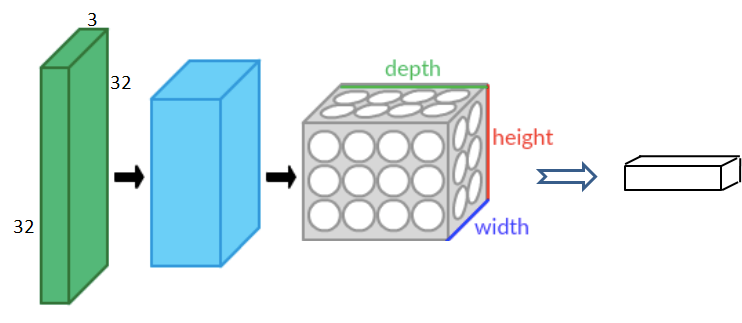

In [35]:
from IPython.display import Image
Image(filename = 'CNN.png', width = 600)

In [36]:
import keras

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
if K == 'tensorflow':
    keras.backend.image_data_format = 'tf'
else:
    keras.backend.image_data_format = 'th'

In [37]:
# Importing the necessary packages
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model

In [38]:
np.random.seed(2017)

batch_size = 256
nb_classes = 10
nb_epoch = 10 # the number of epochs
nb_filters = 10 # the number of filters
nb_conv = 3 # window or kernel size of filter
nb_pool = 2 # window size of pooling
kernel_size = 3 # convolution kernel size

img_rows, img_cols = 32, 32
img_channels = 3

if K.image_data_format == 'th':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)

In [39]:
# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [40]:
# Reshaping inputs 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing inputs from 0-255 to 0-1
X_train /= 255
X_test /= 255

In [41]:
# One hot encode outputs
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [42]:
# Model Configuration
# Defining two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, input_shape = input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size = (nb_pool, nb_pool)),
    Flatten(),
]
classification_layers = [
    Dense(512),
    Activation('relu'),
    Dense(nb_classes),
    Activation('softmax')
]

In [43]:
# Creating the complete model
model = Sequential(feature_layers + classification_layers)

In [44]:
# Compiling the complete model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Summary of the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

In [45]:
# Fitting the model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = nb_epoch, batch_size = batch_size, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 99us/sample - loss: 1.6334 - acc: 0.4189 - val_loss: 1.3589 - val_acc: 0.5160
Epoch 2/10
50000/50000 [==============================] - 4s 87us/sample - loss: 1.2600 - acc: 0.5524 - val_loss: 1.2149 - val_acc: 0.5709
Epoch 3/10
50000/50000 [==============================] - 4s 88us/sample - loss: 1.1148 - acc: 0.6068 - val_loss: 1.1388 - val_acc: 0.5935
Epoch 4/10
50000/50000 [==============================] - 4s 88us/sample - loss: 1.0203 - acc: 0.6418 - val_loss: 1.0816 - val_acc: 0.6204
Epoch 5/10
50000/50000 [==============================] - 5s 108us/sample - loss: 0.9402 - acc: 0.6702 - val_loss: 1.0389 - val_acc: 0.6378
Epoch 6/10
50000/50000 [==============================] - 5s 95us/sample - loss: 0.8635 - acc: 0.7017 - val_loss: 0.9854 - val_acc: 0.6570
Epoch 7/10
50000/50000 [==============================] - 4s 89us/sample - loss: 0.7958 - acc: 0.7254 - val_loss: 0

### Visualization of layers

In [46]:
# Function for visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)  
    
def draw_digit(data, row, col):
    for j in range(row):
        plt.figure(figsize=(20, 20))
        for i in range(col):
            plt.subplot(row, col, i+1)
            plt.imshow(data[j,:,:,i])
            plt.axis('off')
        plt.tight_layout()
    plt.show()  

### Input layer (original image)

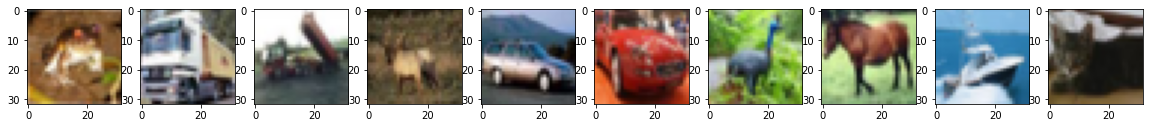

In [47]:
show_size = 10
plt.figure(figsize = (20, 20))
for i in range(show_size):
    draw(X_train[i], 1, show_size, i + 1)
plt.show()

### First Layer

First layer shape:  (10, 30, 30, 10)


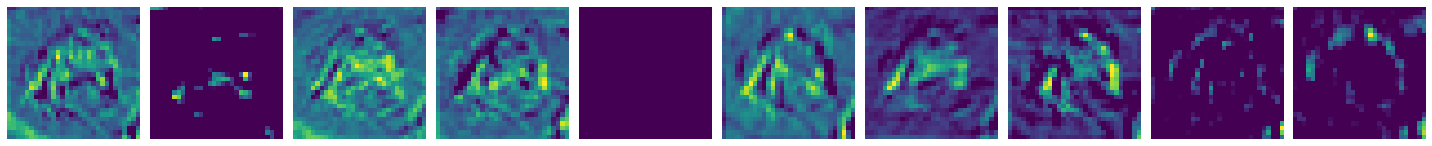

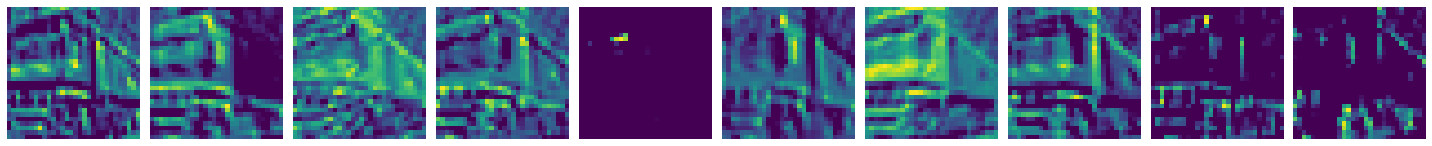

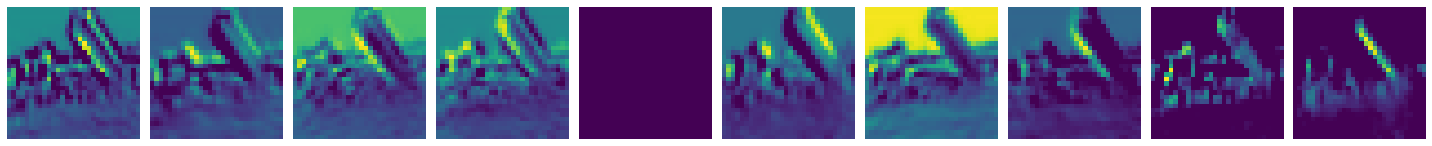

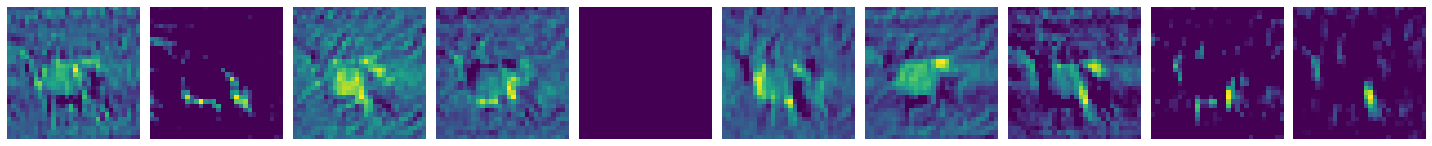

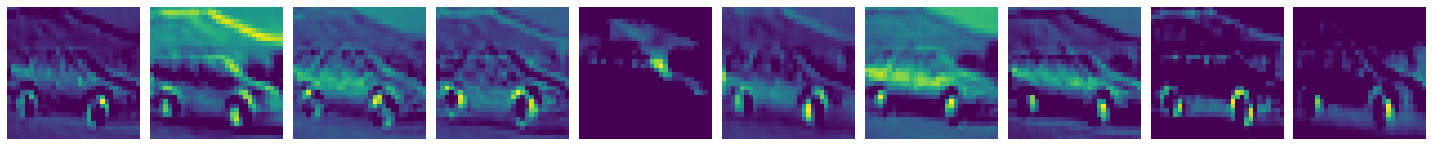

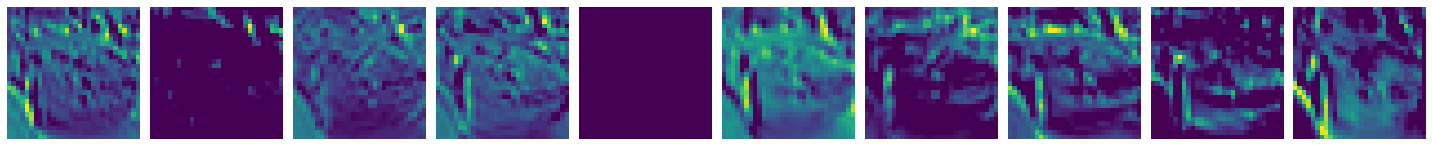

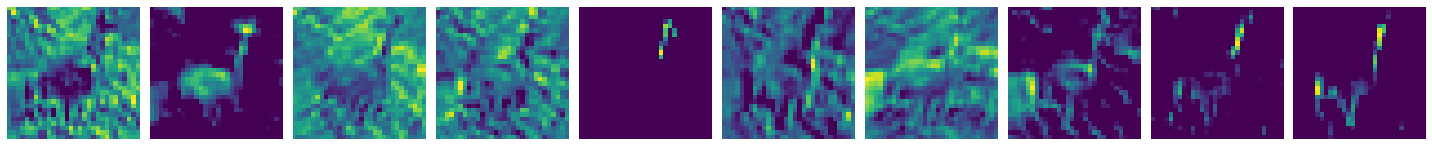

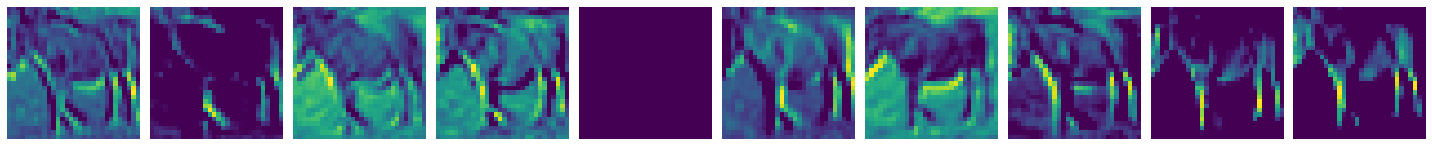

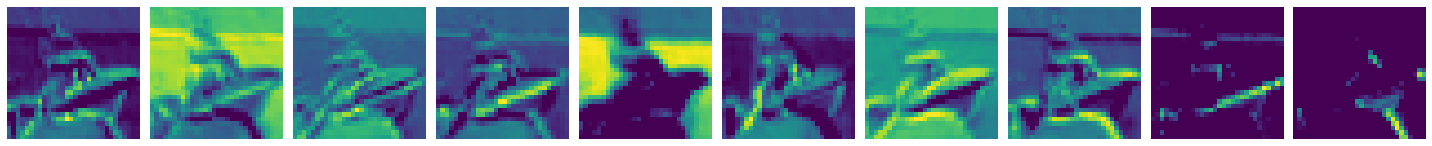

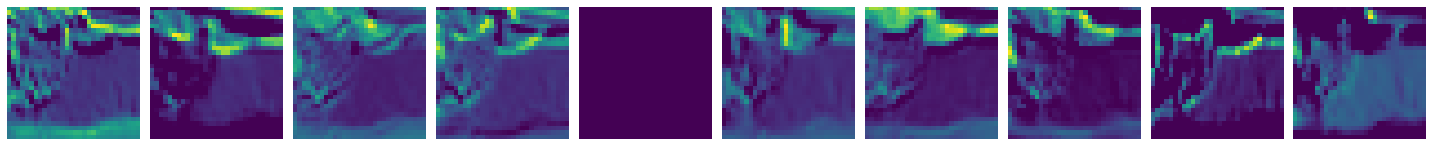

In [48]:
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

print ('First layer shape: ', first_layer.shape)
draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])

### Second Layer

Second layer shape:  (10, 28, 28, 10)


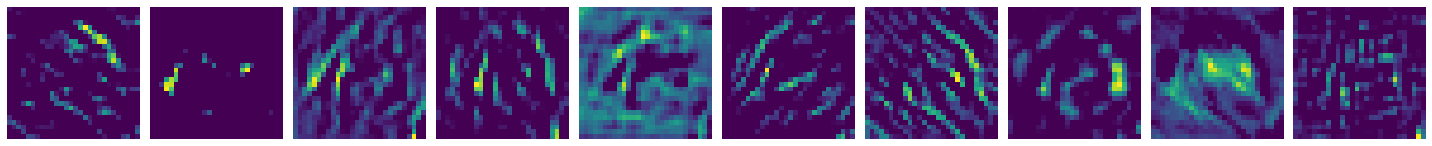

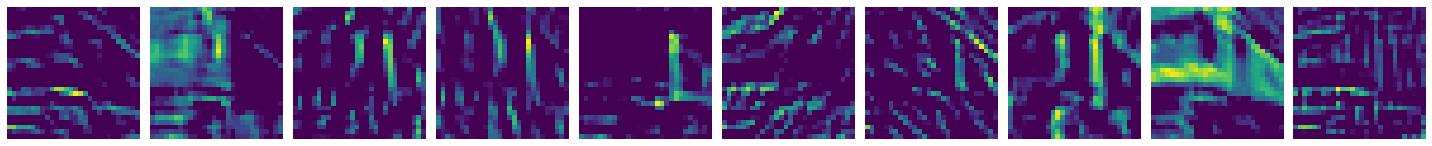

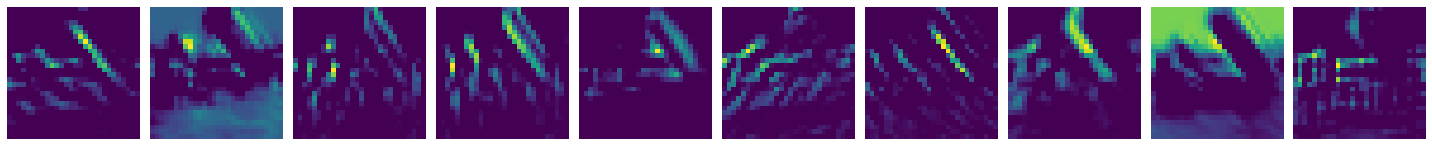

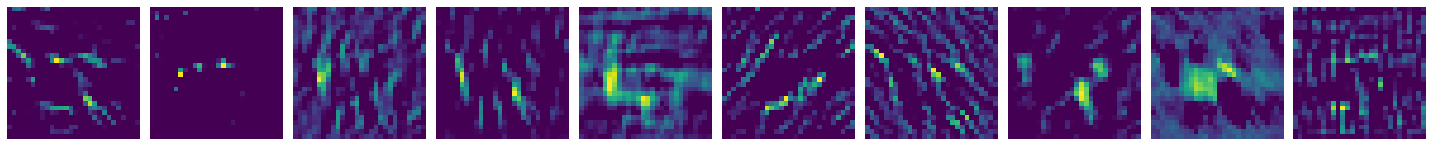

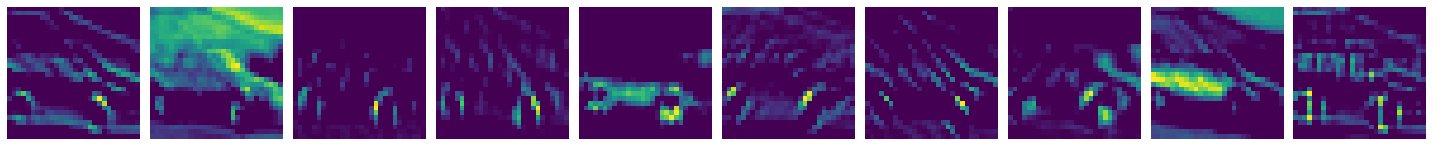

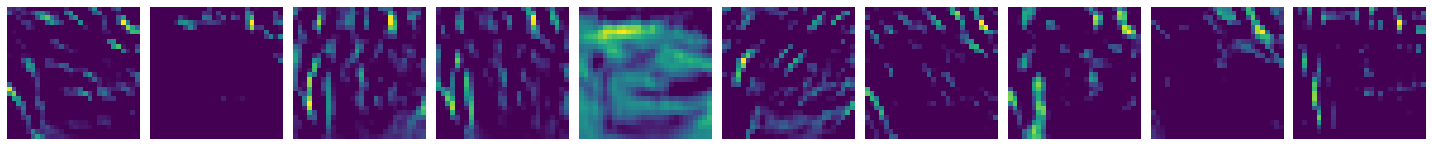

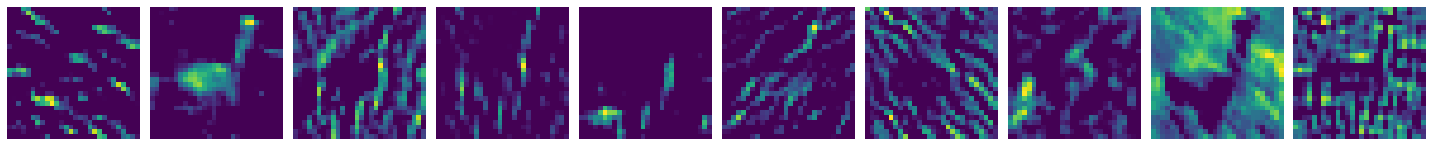

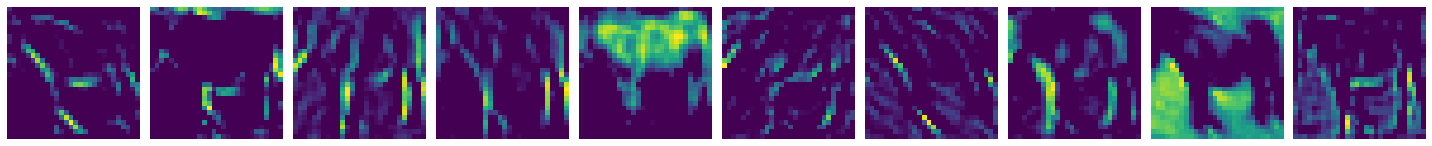

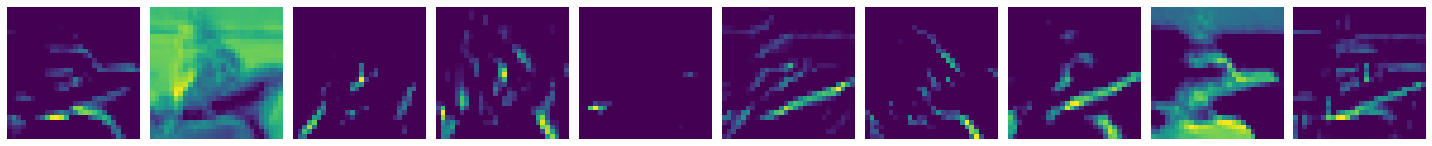

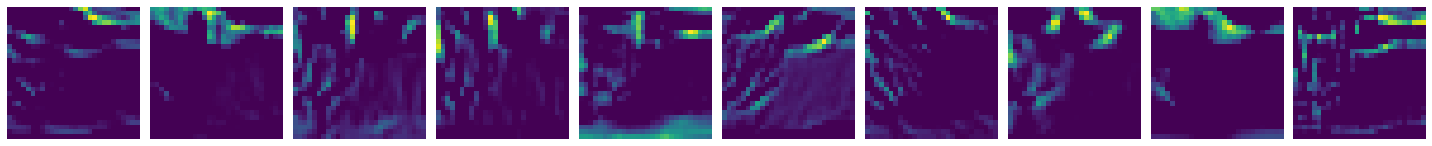

In [49]:
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]

print ('Second layer shape: ', second_layers.shape)
draw_digit(second_layers, second_layers.shape[0], second_layers.shape[3])

### Third Layer

third layer shape:  (10, 14, 14, 10)


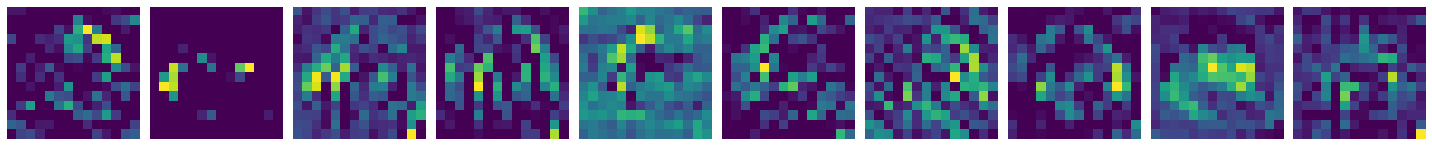

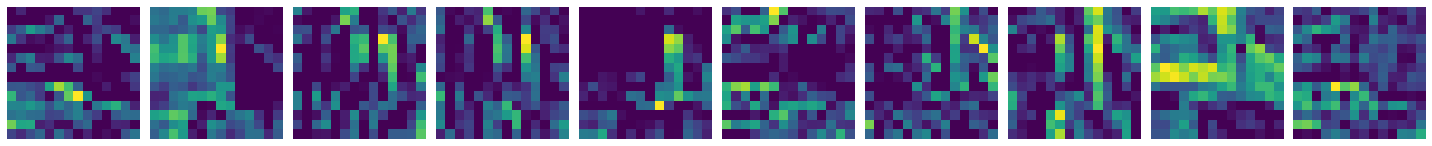

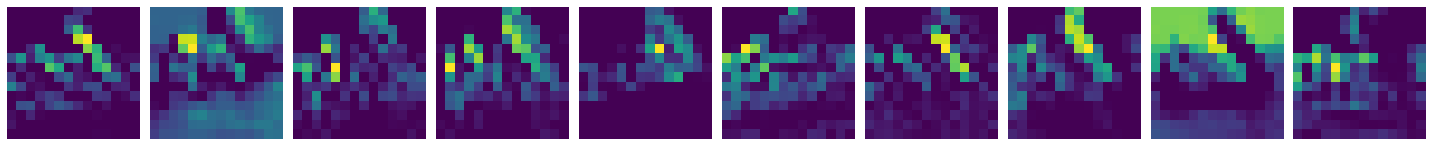

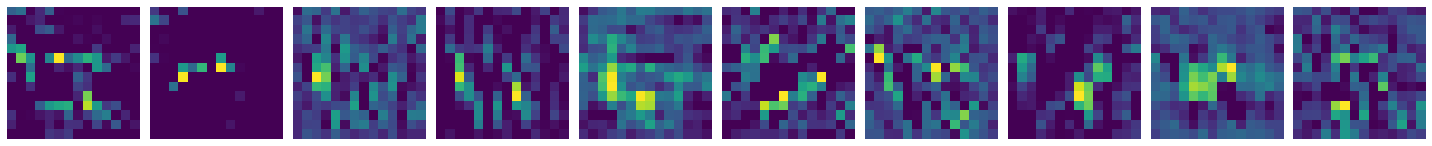

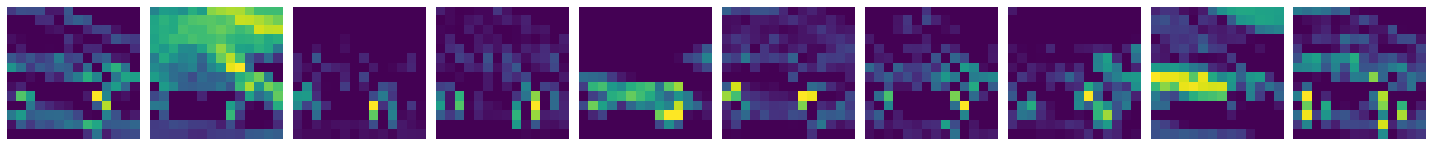

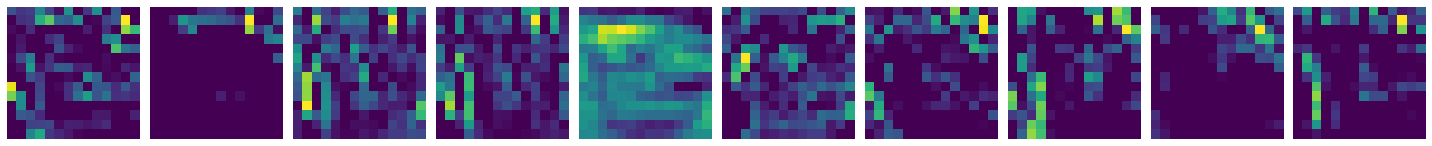

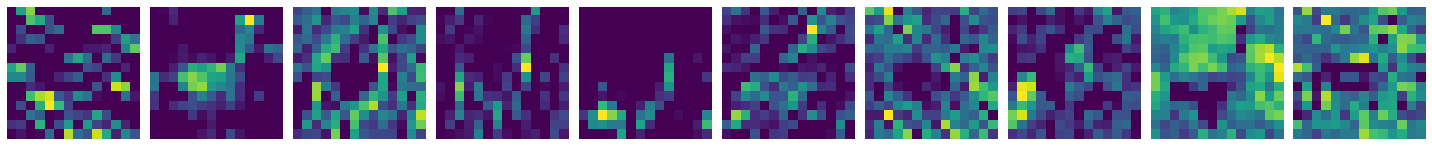

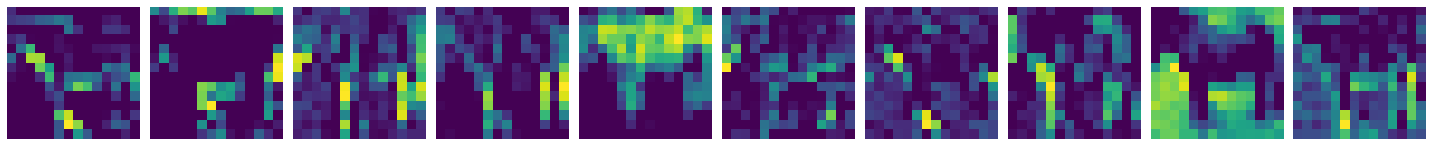

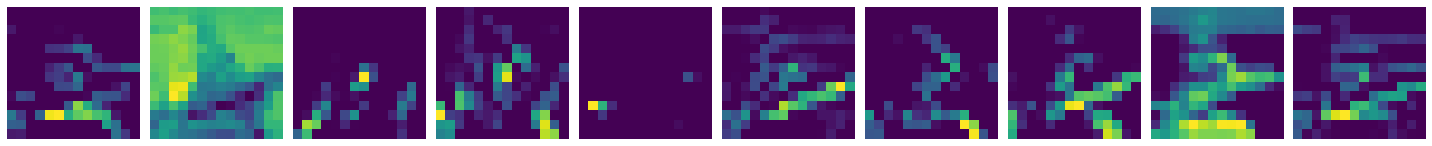

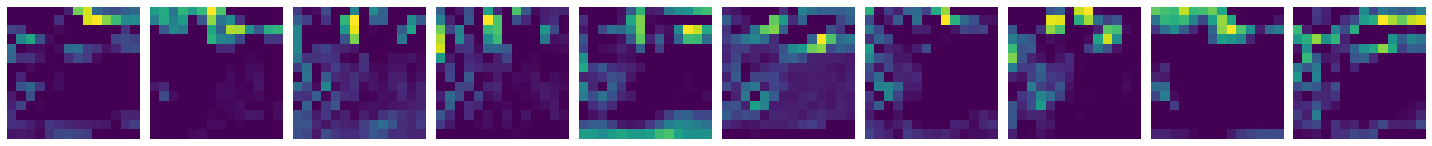

In [50]:
get_third_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]

print ('third layer shape: ', third_layers.shape)
draw_digit(third_layers, third_layers.shape[0], third_layers.shape[3])

## CNN on MNIST Dataset

In [51]:
# Importing the mnist dataset
from keras.datasets import mnist

In [52]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 10 # the number of epochs
kernel_size = 3 # convolution kernel size

if K.image_data_format == 'th':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [53]:
# Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [54]:
# Reshaping inputs
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing inputs from 0-255 to 0-1
X_train /= 255
X_test /= 255

In [55]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [56]:
# Converting class vectors to binary class matrices using one hot encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [57]:
# Model Configuration
# Defining two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, input_shape = input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size = nb_pool),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

In [58]:
# Creating the complete model
model = Sequential(feature_layers + classification_layers)

In [59]:
# Compiling the complete model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Summary of the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 720)              

In [60]:
# Fitting the model
model.fit(X_train, Y_train, batch_size = 256, epochs = nb_epoch, verbose = 1,  validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 59us/sample - loss: 0.7244 - acc: 0.7735 - val_loss: 0.2252 - val_acc: 0.9376
Epoch 2/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3275 - acc: 0.9027 - val_loss: 0.1562 - val_acc: 0.9571
Epoch 3/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.2495 - acc: 0.9247 - val_loss: 0.1180 - val_acc: 0.9669
Epoch 4/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.2043 - acc: 0.9370 - val_loss: 0.0934 - val_acc: 0.9730
Epoch 5/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1778 - acc: 0.9447 - val_loss: 0.0825 - val_acc: 0.9766
Epoch 6/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.1557 - acc: 0.9528 - val_loss: 0.0758 - val_acc: 0.9790
Epoch 7/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.1413 - acc: 0.9568 - val_loss: 0.

### Visualization of Layers

In [61]:
# Function for visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')
    
def draw_digit(data, row, col):
    for j in range(row):
        plt.figure(figsize=(8,8))
        for i in range(col):
            plt.subplot(row, col, i+1)
            plt.imshow(data[j,:,:,i], cmap=plt.cm.gray_r)
            plt.axis('off')
        plt.tight_layout()
    plt.show()

### Sample input layer (original image)

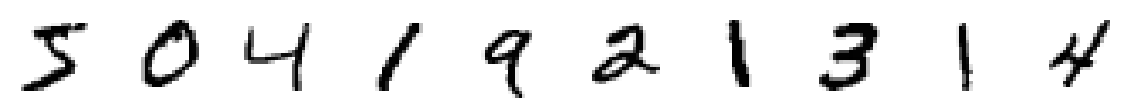

In [62]:
show_size = 10
plt.figure(figsize=(20, 20))

for i in range(show_size):
    draw(X_train[i].reshape(28, 28), 1, show_size, i + 1)
plt.show()

### First layer with 5 filters

first layer shape:  (10, 26, 26, 5)


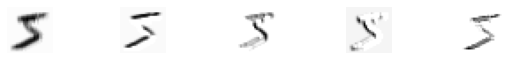

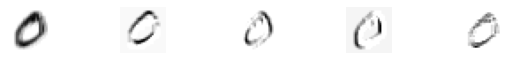

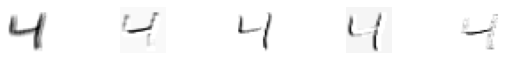

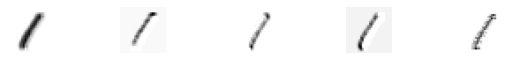

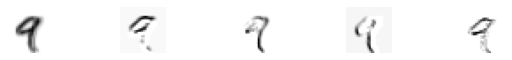

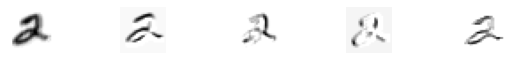

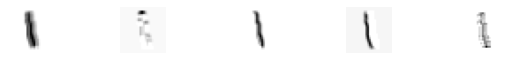

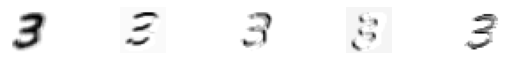

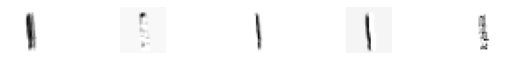

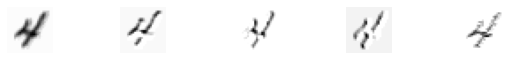

In [63]:
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

print ('first layer shape: ', first_layer.shape)
    
draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])  

### Second layer with 5 filters

second layer shape:  (10, 24, 24, 5)


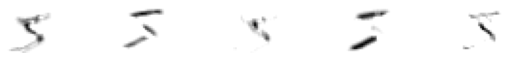

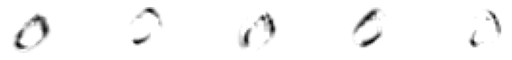

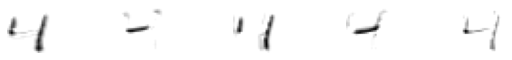

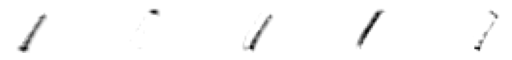

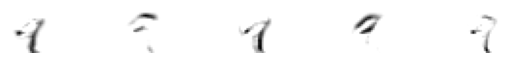

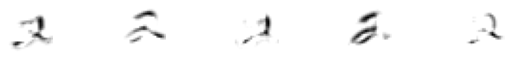

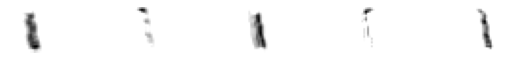

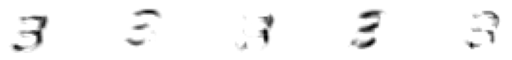

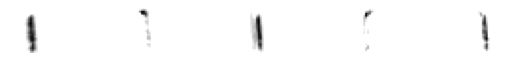

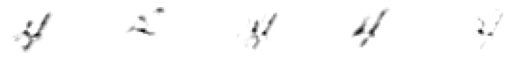

In [64]:
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layer = get_second_layer_output([X_train[0:show_size]])[0]

print ('second layer shape: ', second_layer.shape)

draw_digit(second_layer, second_layer.shape[0], second_layer.shape[3])

### Third layer with 5 filters

thrid layer shape:  (10, 12, 12, 5)


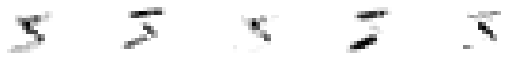

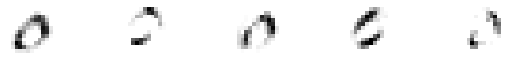

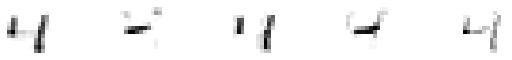

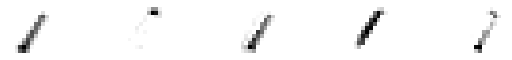

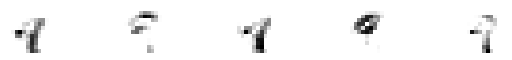

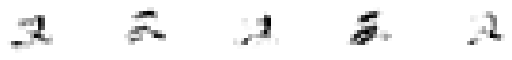

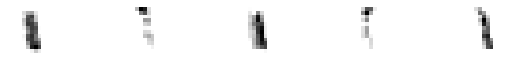

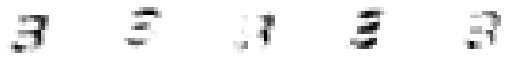

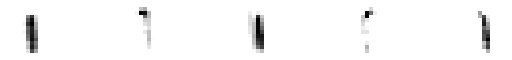

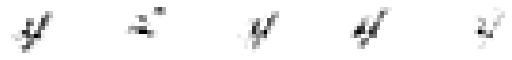

In [65]:
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_3rd_layer_output([X_train[0:show_size]])[0]

print ('thrid layer shape: ', third_layers.shape)

draw_digit(third_layers, third_layers.shape[0], third_layers.shape[3])